In [1]:
# Author: Lea Kotler
# Date: 6 July 2023

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
df = pd.read_csv("Uncleaned_Cnn.csv")
df1 = pd.read_csv("Uncleaned_cnn1.csv")
df2 = pd.read_csv("Uncleaned_cnn_week1.csv")

In [4]:
print(df.info())
print(df1.info())
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   428 non-null    object
 1   views   428 non-null    object
 2   when    428 non-null    object
dtypes: object(3)
memory usage: 10.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   263 non-null    object
 1   views   263 non-null    object
 2   when    263 non-null    object
dtypes: object(3)
memory usage: 6.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   428 non-null    object
 1   views   428 non-null    object
 2   when    428 non-null    object
dtypes: object(3)
memory usage: 10.2+ KB
None


In [5]:
print(df.shape)
print(df1.shape)
print(df2.shape)

(428, 3)
(263, 3)
(428, 3)


In [6]:
duplicates = [pd.merge(df, df1,on=['title'],how ='inner')['title'].to_list()]
duplicates.append(pd.merge(df, df2,on=['title'],how ='inner')['title'].to_list())
duplicates.append(pd.merge(df1, df2,on=['title'],how ='inner')['title'].to_list())
print(duplicates)

[["College grad challenges Justice Thomas' argument on affirmative action", "College grad challenges Justice Thomas' argument on affirmative action", "AI needs 'a new era of law and regulation,' says Microsoft president"], [], []]


In [7]:
frames = [df,df1,df2]
df_merge = pd.concat(frames,ignore_index=True)
df_merge

,title,views,when
0,College grad challenges Justice Thomas' argume...,2.9K views,19 minutes ago
1,College grad challenges Justice Thomas' argume...,2.9K views,19 minutes ago
2,"AI needs 'a new era of law and regulation,' sa...",10K views,9 hours ago
3,Hear why Pence wanted to meet with Zelensky an...,86K views,16 hours ago
4,Watch as verdict is read in former Parkland sc...,26K views,21 hours ago
...,...,...,...
1114,Dr. Sanjay Gupta on Screens & Teens (Including...,25K views,4 months ago
1115,Jimmy Carter to begin receiving hospice care,333K views,4 months ago
1116,'He could easily destroy us': See Tucker Carls...,417K views,4 months ago
1117,Doctor breaks down challenges Bruce Willis cou...,222K views,4 months ago


In [8]:
#Splitting "views" column into columns "number" and "text"
df_merge[['number with prefix','text']]=df_merge['views'].str.split(expand=True)
df_merge['number']=df_merge['number with prefix'].str[:-1]
df_merge['prefix']=df_merge['number with prefix'].str[-1:]
df_merge

,title,views,when,number with prefix,text,number,prefix
0,College grad challenges Justice Thomas' argume...,2.9K views,19 minutes ago,2.9K,views,2.9,K
1,College grad challenges Justice Thomas' argume...,2.9K views,19 minutes ago,2.9K,views,2.9,K
2,"AI needs 'a new era of law and regulation,' sa...",10K views,9 hours ago,10K,views,10,K
3,Hear why Pence wanted to meet with Zelensky an...,86K views,16 hours ago,86K,views,86,K
4,Watch as verdict is read in former Parkland sc...,26K views,21 hours ago,26K,views,26,K
...,...,...,...,...,...,...,...
1114,Dr. Sanjay Gupta on Screens & Teens (Including...,25K views,4 months ago,25K,views,25,K
1115,Jimmy Carter to begin receiving hospice care,333K views,4 months ago,333K,views,333,K
1116,'He could easily destroy us': See Tucker Carls...,417K views,4 months ago,417K,views,417,K
1117,Doctor breaks down challenges Bruce Willis cou...,222K views,4 months ago,222K,views,222,K


In [9]:
df_merge['prefix'].unique()

array(['K', 'M', '3'], dtype=object)

In [10]:
df_merge['K'] = df_merge[df_merge.prefix=='K']['number'].astype(float)*1000
df_merge['M'] = df_merge[df_merge.prefix=='M']['number'].astype(float)*1000000
df_merge['num'] = df_merge[df_merge.prefix=='3']['number'].astype(float)*10 + 3
df_merge['number of views'] = df_merge['K'].combine_first(df_merge['M'].combine_first(df_merge['num']))

df_merge[~(df_merge.prefix=='K')].head(5)

,title,views,when,number with prefix,text,number,prefix,K,M,num,number of views
56,Bolton makes prediction on Trump's political c...,1.7M views,2 weeks ago,1.7M,views,1.7,M,NaN,1700000.0,NaN,1700000.0
153,George Santos in federal custody as feds unsea...,1M views,1 month ago,1M,views,1,M,NaN,1000000.0,NaN,1000000.0
163,What Wagner leader’s message may tell us about...,1.5M views,1 month ago,1.5M,views,1.5,M,NaN,1500000.0,NaN,1500000.0
184,Wagner leader issues ominous warning about his...,1.2M views,2 months ago,1.2M,views,1.2,M,NaN,1200000.0,NaN,1200000.0
212,CNN anchor worked at Fox for 16 years. Hear wh...,1M views,2 months ago,1M,views,1,M,NaN,1000000.0,NaN,1000000.0


In [11]:
del df_merge['number with prefix']
del df_merge['text']
del df_merge['number']
del df_merge['prefix']
del df_merge['K']
del df_merge['M']
del df_merge['num']

In [12]:
df_merge.head()

,title,views,when,number of views
0,College grad challenges Justice Thomas' argume...,2.9K views,19 minutes ago,2900.0
1,College grad challenges Justice Thomas' argume...,2.9K views,19 minutes ago,2900.0
2,"AI needs 'a new era of law and regulation,' sa...",10K views,9 hours ago,10000.0
3,Hear why Pence wanted to meet with Zelensky an...,86K views,16 hours ago,86000.0
4,Watch as verdict is read in former Parkland sc...,26K views,21 hours ago,26000.0


In [13]:
#Splitting "views" column into columns "number" and "text"
df_merge[['number','prefix','text']]=df_merge['when'].str.split(expand=True)
df_merge

,title,views,when,number of views,number,prefix,text
0,College grad challenges Justice Thomas' argume...,2.9K views,19 minutes ago,2900.0,19,minutes,ago
1,College grad challenges Justice Thomas' argume...,2.9K views,19 minutes ago,2900.0,19,minutes,ago
2,"AI needs 'a new era of law and regulation,' sa...",10K views,9 hours ago,10000.0,9,hours,ago
3,Hear why Pence wanted to meet with Zelensky an...,86K views,16 hours ago,86000.0,16,hours,ago
4,Watch as verdict is read in former Parkland sc...,26K views,21 hours ago,26000.0,21,hours,ago
...,...,...,...,...,...,...,...
1114,Dr. Sanjay Gupta on Screens & Teens (Including...,25K views,4 months ago,25000.0,4,months,ago
1115,Jimmy Carter to begin receiving hospice care,333K views,4 months ago,333000.0,4,months,ago
1116,'He could easily destroy us': See Tucker Carls...,417K views,4 months ago,417000.0,4,months,ago
1117,Doctor breaks down challenges Bruce Willis cou...,222K views,4 months ago,222000.0,4,months,ago


In [14]:
df_merge['prefix'].unique()

array(['minutes', 'hours', 'day', 'days', 'weeks', 'month', 'months',
       'hour'], dtype=object)

In [15]:
df_merge[~(df_merge.prefix=='minutes')]

,title,views,when,number of views,number,prefix,text
2,"AI needs 'a new era of law and regulation,' sa...",10K views,9 hours ago,10000.0,9,hours,ago
3,Hear why Pence wanted to meet with Zelensky an...,86K views,16 hours ago,86000.0,16,hours,ago
4,Watch as verdict is read in former Parkland sc...,26K views,21 hours ago,26000.0,21,hours,ago
5,Legal analyst identifies part of ruling that l...,86K views,1 day ago,86000.0,1,day,ago
6,Presumed human remains found in Titan wreckage,277K views,1 day ago,277000.0,1,day,ago
...,...,...,...,...,...,...,...
1114,Dr. Sanjay Gupta on Screens & Teens (Including...,25K views,4 months ago,25000.0,4,months,ago
1115,Jimmy Carter to begin receiving hospice care,333K views,4 months ago,333000.0,4,months,ago
1116,'He could easily destroy us': See Tucker Carls...,417K views,4 months ago,417000.0,4,months,ago
1117,Doctor breaks down challenges Bruce Willis cou...,222K views,4 months ago,222000.0,4,months,ago


In [16]:
df_merge['minutes'] = df_merge[df_merge.prefix=='minutes']['number'].astype(int)
df_merge['hours'] = df_merge[(df_merge.prefix=='hour')|(df_merge.prefix=='hours')]['number'].astype(int)*60
df_merge['days'] = df_merge[(df_merge.prefix=='day')| (df_merge.prefix=='days')]['number'].astype(int)*60*24
df_merge['weeks'] = df_merge[(df_merge.prefix=='week')| (df_merge.prefix=='weeks')]['number'].astype(int)*60*24*7
df_merge['months'] = df_merge[(df_merge.prefix=='month')| (df_merge.prefix=='months')]['number'].astype(int)*60*24*30
df_merge['when viewed in minutes'] = df_merge['minutes'].combine_first(df_merge['hours'].combine_first(df_merge['days'].combine_first(df_merge['weeks'].combine_first(df_merge['months']))))
df_merge

,title,views,when,number of views,number,prefix,text,minutes,hours,days,weeks,months,when viewed in minutes
0,College grad challenges Justice Thomas' argume...,2.9K views,19 minutes ago,2900.0,19,minutes,ago,19.0,NaN,NaN,NaN,NaN,19.0
1,College grad challenges Justice Thomas' argume...,2.9K views,19 minutes ago,2900.0,19,minutes,ago,19.0,NaN,NaN,NaN,NaN,19.0
2,"AI needs 'a new era of law and regulation,' sa...",10K views,9 hours ago,10000.0,9,hours,ago,NaN,540.0,NaN,NaN,NaN,540.0
3,Hear why Pence wanted to meet with Zelensky an...,86K views,16 hours ago,86000.0,16,hours,ago,NaN,960.0,NaN,NaN,NaN,960.0
4,Watch as verdict is read in former Parkland sc...,26K views,21 hours ago,26000.0,21,hours,ago,NaN,1260.0,NaN,NaN,NaN,1260.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,Dr. Sanjay Gupta on Screens & Teens (Including...,25K views,4 months ago,25000.0,4,months,ago,NaN,NaN,NaN,NaN,172800.0,172800.0
1115,Jimmy Carter to begin receiving hospice care,333K views,4 months ago,333000.0,4,months,ago,NaN,NaN,NaN,NaN,172800.0,172800.0
1116,'He could easily destroy us': See Tucker Carls...,417K views,4 months ago,417000.0,4,months,ago,NaN,NaN,NaN,NaN,172800.0,172800.0
1117,Doctor breaks down challenges Bruce Willis cou...,222K views,4 months ago,222000.0,4,months,ago,NaN,NaN,NaN,NaN,172800.0,172800.0


In [17]:
del df_merge['text']
del df_merge['number']
del df_merge['prefix']
del df_merge['minutes']
del df_merge['hours']
del df_merge['days']
del df_merge['weeks']
del df_merge['months']

In [18]:
df_merge = df_merge.sort_values('number of views', ascending=False)
df_merge

,title,views,when,number of views,when viewed in minutes
372,Hear Chinese warning to US plane in midair ove...,5.9M views,4 months ago,5900000.0,172800.0
912,Hear Arnold Schwarzenegger's prediction about ...,5M views,2 months ago,5000000.0,86400.0
684,Intel officer for Putin defects. Hear what he ...,3.9M views,2 months ago,3900000.0,86400.0
320,CNN follows migrants illegally entering Canada...,3.4M views,3 months ago,3400000.0,129600.0
748,James Cameron on 'fundamental flaw' in design ...,3.3M views,2 weeks ago,3300000.0,20160.0
...,...,...,...,...,...
562,Navigating Misinformation at the Border,3.3K views,1 month ago,3300.0,43200.0
1,College grad challenges Justice Thomas' argume...,2.9K views,19 minutes ago,2900.0,19.0
0,College grad challenges Justice Thomas' argume...,2.9K views,19 minutes ago,2900.0,19.0
1020,Pediatricians Caught in a Political Crossfire,2.1K views,3 months ago,2100.0,129600.0


In [19]:
df_merge = df_merge.drop_duplicates(subset=['title'])
df_merge

,title,views,when,number of views,when viewed in minutes
372,Hear Chinese warning to US plane in midair ove...,5.9M views,4 months ago,5900000.0,172800.0
912,Hear Arnold Schwarzenegger's prediction about ...,5M views,2 months ago,5000000.0,86400.0
684,Intel officer for Putin defects. Hear what he ...,3.9M views,2 months ago,3900000.0,86400.0
320,CNN follows migrants illegally entering Canada...,3.4M views,3 months ago,3400000.0,129600.0
748,James Cameron on 'fundamental flaw' in design ...,3.3M views,2 weeks ago,3300000.0,20160.0
...,...,...,...,...,...
295,The Prince and the Press,4.7K views,3 months ago,4700.0,129600.0
971,Holding Space for Therapy Speak,4.2K views,3 months ago,4200.0,129600.0
562,Navigating Misinformation at the Border,3.3K views,1 month ago,3300.0,43200.0
1020,Pediatricians Caught in a Political Crossfire,2.1K views,3 months ago,2100.0,129600.0


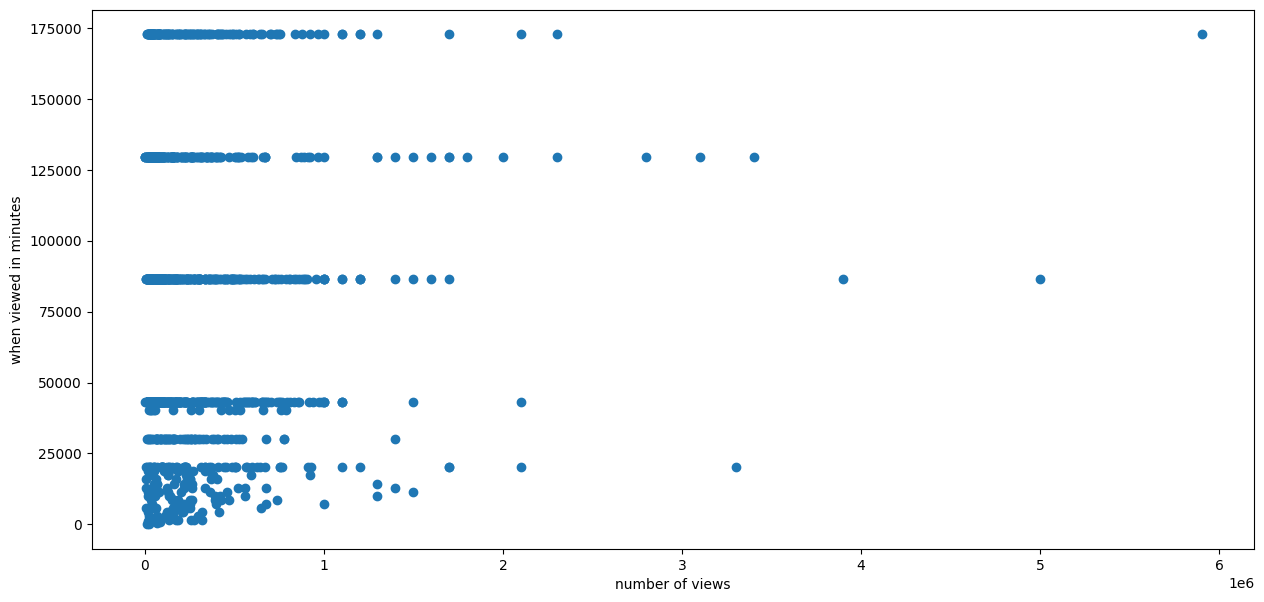

In [20]:
f, ax = plt.subplots(figsize=(15,7))
plt.scatter(df_merge['number of views'], df_merge['when viewed in minutes'])
ax.set_xlabel('number of views')
ax.set_ylabel('when viewed in minutes')
plt.show()

In [21]:
df_merge.head(10)

,title,views,when,number of views,when viewed in minutes
372,Hear Chinese warning to US plane in midair ove...,5.9M views,4 months ago,5900000.0,172800.0
912,Hear Arnold Schwarzenegger's prediction about ...,5M views,2 months ago,5000000.0,86400.0
684,Intel officer for Putin defects. Hear what he ...,3.9M views,2 months ago,3900000.0,86400.0
320,CNN follows migrants illegally entering Canada...,3.4M views,3 months ago,3400000.0,129600.0
748,James Cameron on 'fundamental flaw' in design ...,3.3M views,2 weeks ago,3300000.0,20160.0
270,Russia is ‘getting hammered’: Top US general o...,3.1M views,3 months ago,3100000.0,129600.0
279,Jon Stewart: This is why Trump became popular ...,2.8M views,3 months ago,2800000.0,129600.0
1038,What a sniper saw fighting Russian soldiers in...,2.3M views,3 months ago,2300000.0,129600.0
1049,CEO describes pulling money from bank hours be...,2.3M views,4 months ago,2300000.0,172800.0
805,Ukraine official: Gates of war have opened on ...,2.1M views,1 month ago,2100000.0,43200.0


In [22]:
df_merge[df_merge['when viewed in minutes']<=60*24].head(10)

,title,views,when,number of views,when viewed in minutes
432,Ex-CIA operative shares what Wagner rebellion ...,318K views,1 day ago,318000.0,1440.0
6,Presumed human remains found in Titan wreckage,277K views,1 day ago,277000.0,1440.0
431,'Losing the 21st century': Fareed examines the...,261K views,1 day ago,261000.0,1440.0
7,Putin greets supporters in rare appearance aft...,188K views,1 day ago,188000.0,1440.0
8,Ex-CIA operative breaks down what Putin should...,177K views,1 day ago,177000.0,1440.0
696,Hear Pence’s response when asked why he didn’t...,139K views,1 day ago,139000.0,1440.0
5,Legal analyst identifies part of ruling that l...,86K views,1 day ago,86000.0,1440.0
3,Hear why Pence wanted to meet with Zelensky an...,86K views,16 hours ago,86000.0,960.0
430,Zelensky calls Putin's reaction to Wagner rebe...,71K views,6 hours ago,71000.0,360.0
695,Kid Rock declared a Bud Light boycott. CNN vis...,70K views,1 day ago,70000.0,1440.0


In [23]:
stopwords = STOPWORDS
print(stopwords)

{'so', 'there', 'these', "what's", 'were', 'our', 'under', 'up', 'about', "why's", "where's", "who's", 'all', 'above', 'not', "hadn't", 'again', 'until', "i'd", 'yourselves', 'between', "aren't", 'their', 'each', 'when', "there's", 'therefore', 'as', 'or', 'she', 'that', 'having', 'through', 'too', 'k', 'himself', "they're", 'me', 'here', "she'd", 'his', 'with', 'down', "haven't", "shan't", 'its', 'can', 'could', 'else', 'most', 'ours', "didn't", 'cannot', 'have', 'once', 'theirs', 'them', "you'll", "wouldn't", 'only', 'an', 'http', 'other', 'would', "they've", 'it', 'did', 'by', 'for', 'just', 'any', 'however', 'out', 'hers', "he'd", "how's", 'few', 'then', 'a', 'should', 'themselves', 'than', "i've", "we'd", 'on', 'while', "i'm", 'be', 'if', "she'll", "you've", 'since', "it's", "won't", 'been', 'what', 'from', 'nor', "they'll", 'off', 'being', 'r', 'such', "that's", "doesn't", 'ourselves', "we've", 'before', 'ought', 'him', 'shall', 'very', 'both', "you'd", 'like', "he's", 'otherwise

In [24]:
text_data=" ".join(df_merge['title'])
wrdcld=WordCloud(width=800,height=400,background_color='white').generate(text_data)

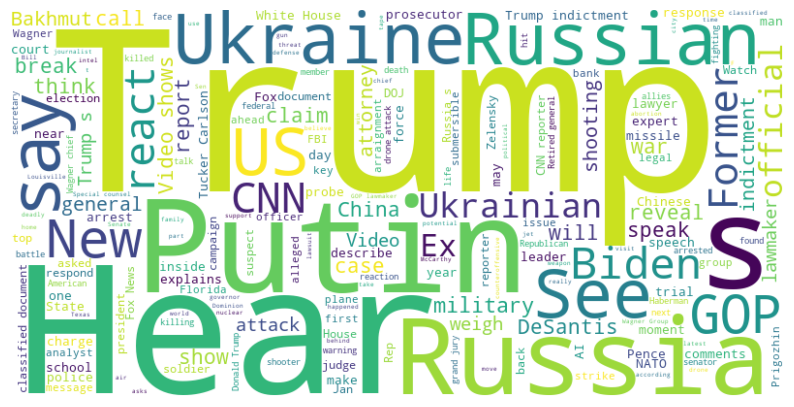

In [25]:
plt.figure(figsize=(10, 6))
plt.imshow(wrdcld, interpolation='bilinear')
plt.axis('off')
plt.show()